In [1]:
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import json
import re     
import datetime as dt
import os
import glob
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler

import matplotlib as mpl
import matplotlib.pylab as plt

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc('font',family = font_name)

# 여기부터가 시작 ~~~~~~~~

In [2]:
## 댓글 파일이 있는 유튜버만 만들어주세요.
df = pd.read_csv('뷰티리스트.csv',encoding='cp949')
name_list = df['이름'].values
name_list
allData = []
for name in name_list:
     df = pd.read_csv(f'{name}/result.csv')
     allData.append(df)
      
dataCombine = pd.concat(allData,axis =0, ignore_index = True)
dataCombine.to_csv('test.csv', index = False, encoding = 'utf-8-sig')

In [3]:
# 키워드 입력해주세요.
key_word = '롬앤'

# 날짜를 str 형식에서 datetime형식으로 전환
testdf = pd.read_csv('test.csv')
real_date=[]
for i in testdf['날짜']:
    dd = datetime.strptime(i, '%Y. %m. %d.').date()
    real_date.append(dd)
real_date
testdf['날짜'] = real_date
testdf =testdf.set_index('날짜')

# 원하는 키워드 입력 contains() 안의 데이터 변경...이외 변경X
list_ = np.array(testdf["댓글"].str.contains(key_word))
list_*1
testdf["count2"] = list_*1
pdf = testdf.pivot_table("count2", "날짜", aggfunc="sum")

#표준화 시키기

sclar= MinMaxScaler()
n_pdf = sclar.fit_transform(pdf[:])
pdf['빈도수'] = n_pdf
pdf_rom =pdf
pdf_rom
del pdf['count2'] # 두 번 실행 안하게 조심!!!

# 날짜 데이터(X축 맞추기)
Real_date = pd.date_range('2020-4-1','2020-6-10')
len(Real_date)
for i in range(len(Real_date)):
    if len(pdf) == len(Real_date):
        break
    else :
        for j in range(len(Real_date)-len(pdf)):
            pdf.loc[j,:] = 0
            pdf.loc[pdf['빈도수'] == '', '빈도수'] = 0
pdf['날짜'] = Real_date
pdf.set_index('날짜',inplace=True)

C:\Users\acorn\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Text(0.5, 1.0, "'롬앤' 유튜브 빈도수")

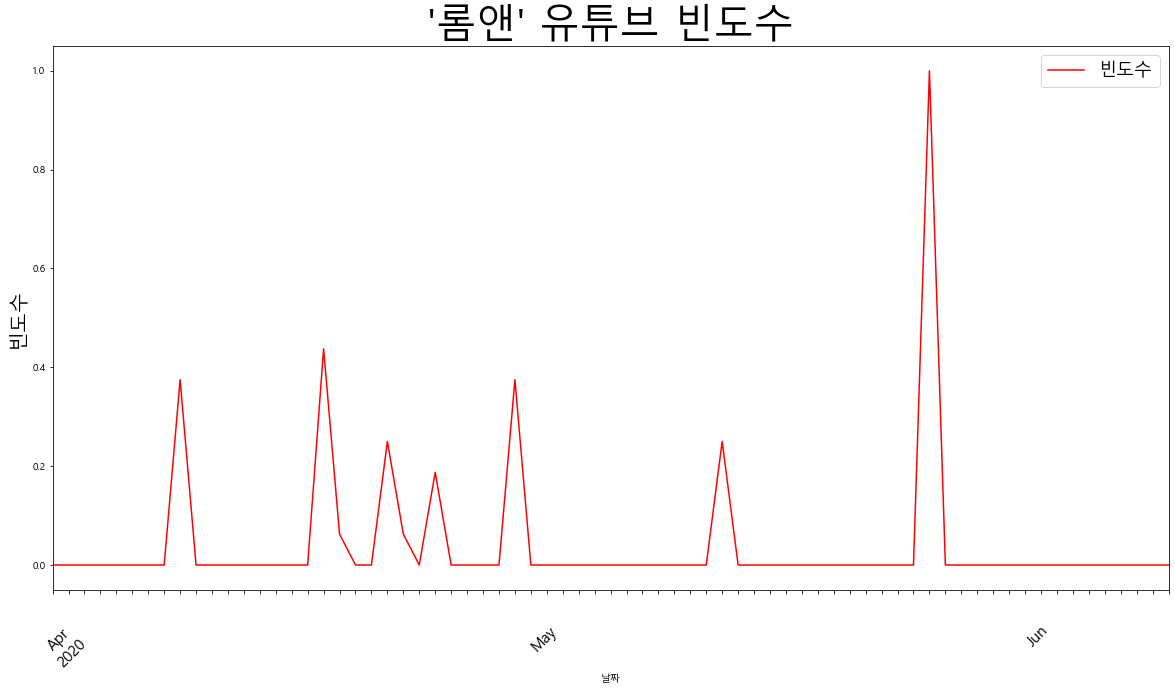

In [4]:
# 날짜형식을 맞춰주기 위해 작성(datetime을 리스트에 추가하게 되면 timestamp형식으로 변경되서...)
ticks = [] 
for date in pdf.index:
    a= datetime.date(date)
    ticks.append(a)
# 그래프 출력/// 그래프 크기를 키울 땐 figsize 변경// 각 라벨크기 변경할 때는 각 라벨에 size= 숫자
# plt.savefig => 출력된 그래프를 현재 작업중인 폴더에 자동저장 *** 파일명 변경 필수 ***
# 각 실행마다 라벨의 단어 변경 필수 !!!

ax = pdf.plot(figsize =(20,10),c='r')
plt.xticks(ticks[::], rotation = 45,size =15)# xticks => X축의 범위를 지정(pdf의 인덱스를 리스트로 설정했기에 첫 시작 날짜부터 끝날짜까지 지정)
# plt.xticks(ticks_n,rotation = 'vertical')
plt.ylabel('빈도수',size = 20) # Y축 이름 설정
plt.legend(fontsize =18)
plt.title('\''+key_word+'\' 유튜브 빈도수',size =40) # 그래프 전체의 이름을 지정
# plt.savefig('롬앤빈도수(유튜브).png', dpi=300)

### 데이터랩에서 받은 파일은 각 키워드에 맞게 키워드(네이버)/// 키워드(구글)로 저장해주시길 바랍니다.

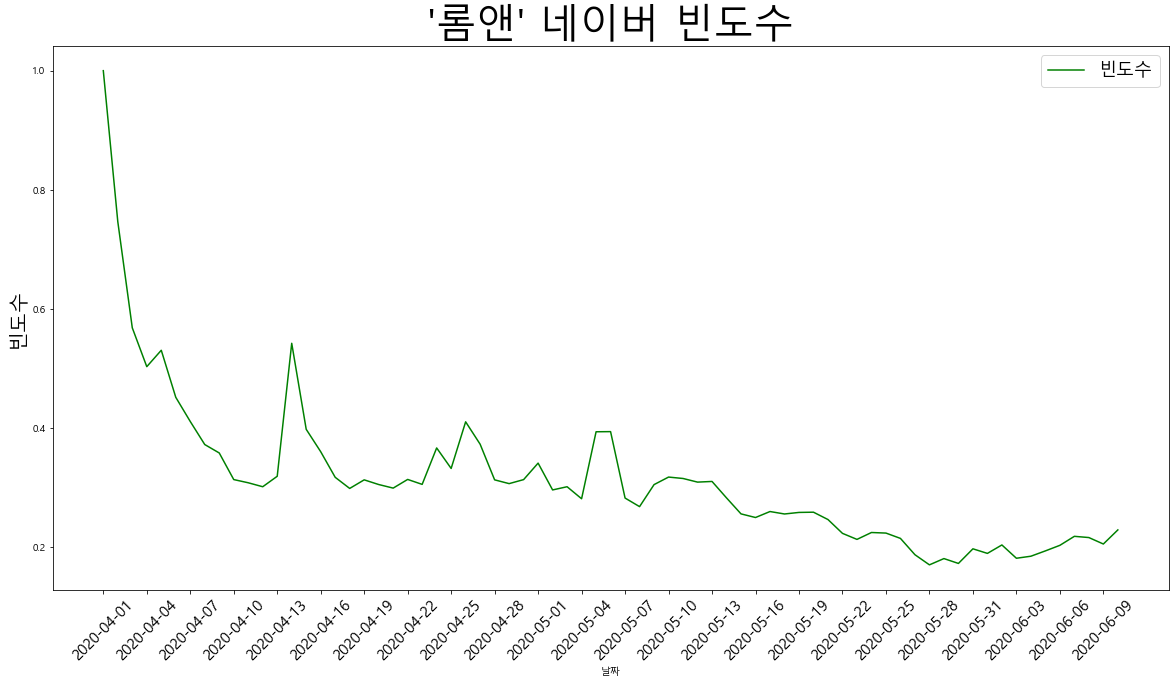

In [129]:
# 네이버 파일형식 변경 및 날짜형식 변경
naver = pd.read_excel(key_word+'(네이버).xlsx')
naver

columns = ['날짜', '빈도수']
ex_naver = naver.iloc[:, :]
ex_naver.columns = ['날짜', '빈도수']
ex_naver = ex_naver.drop([0,1,2,3,4,5])
ex_naver = ex_naver.set_index('날짜')
ex_naver.to_csv('네이버('+key_word+').csv',encoding='utf-8-sig')

# 그래프 시각화
df_naver = pd.read_csv('네이버('+key_word+').csv')
type(df_naver['날짜'][0])
real_date = []
     
for i in df_naver['날짜']:
    ch_date = datetime.strptime(i, '%Y-%m-%d').date()
    real_date.append(ch_date)
real_date
df_naver['날짜'] = real_date
df_naver =df_naver.set_index('날짜')

ticks_n= list(df_naver.index)
df_naver['빈도수']=df_naver['빈도수']*0.01
bx = df_naver.plot(figsize=(20,10),c='g')
plt.xticks(ticks_n[::3],rotation = 45,size=15)
plt.ylabel('빈도수',size =20)
plt.legend(fontsize =18)
plt.title('\''+key_word+'\' 네이버 빈도수',size =40)
plt.savefig(key_word+'빈도수(네이버).png', dpi=300)

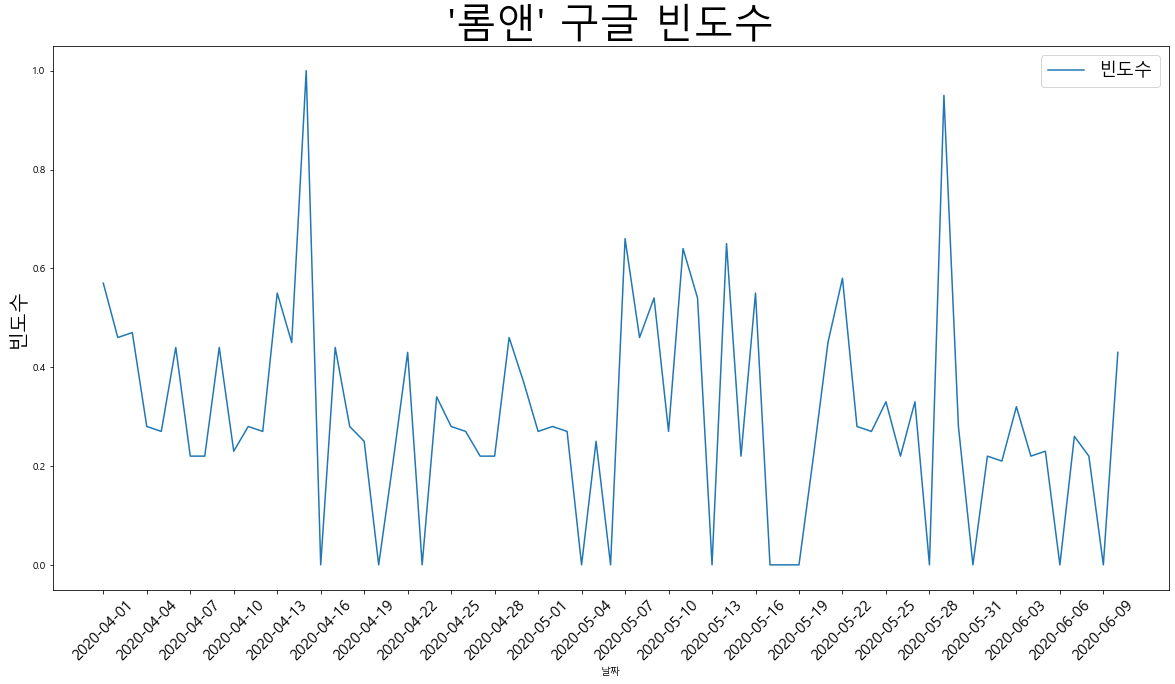

In [5]:
google = pd.read_csv(key_word+'(구글).csv', encoding = 'utf-8')
google = google.reset_index()

df_google = google.iloc[1:, :]
df_google.columns = ['날짜', '빈도수']

df_google = df_google.set_index('날짜')
df_google.to_csv('구글('+key_word+').csv',encoding='utf-8-sig')

# 그래프 시각화
df_google = pd.read_csv('구글('+key_word+').csv')
type(df_google['날짜'][0])
real_date = []

for i in df_google['날짜']:
    ch_date = datetime.strptime(i, '%Y-%m-%d').date()
    real_date.append(ch_date)
real_date
df_google['날짜'] = real_date
df_google = df_google.set_index('날짜')

ticks_g= list(df_google.index)
df_google['빈도수']= df_google['빈도수']*0.01
bx = df_google.plot(figsize=(20,10))
plt.xticks(ticks_g[::3], rotation = 45,size =15)
plt.ylabel('빈도수',size =20)
plt.legend(fontsize =18)
plt.title('\''+key_word+'\' 구글 빈도수',size =40)
plt.savefig(key_word+'빈도수(구글).png', dpi=300)

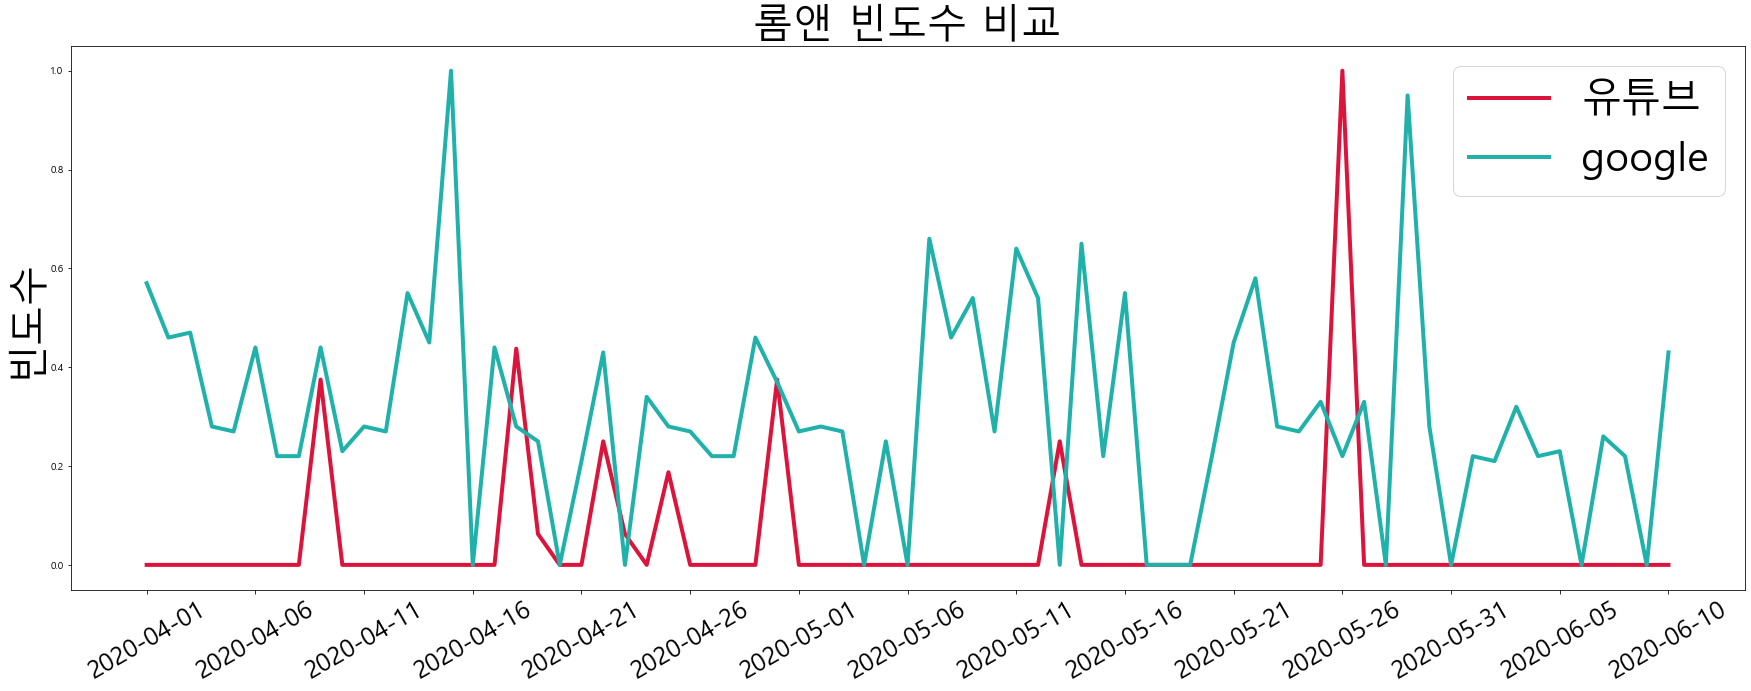

In [30]:
# 여러 값들 같은 그래프 안의 꺾은선 그래프
x_values = pdf.index
# y_values_1 = df_naver['빈도수']
y_values_2 = pdf_rom['빈도수']
y_values_3 = df_google['빈도수']
plt.figure(figsize=(30,10))
# plt.plot(x_values, y_values_1,c='mediumseagreen',linewidth=4)
plt.plot(x_values,y_values_2,c='crimson',linewidth=4)
plt.plot(x_values, y_values_3,linewidth=4,c='lightseagreen')
plt.xticks(ticks[::5],rotation = 30,size= 25)
plt.legend(['유튜브','google'],fontsize =40)
plt.ylabel('빈도수',size = 40)
plt.title(key_word+' 빈도수 비교',size= 40)
fig = plt.gcf()
plt.show()
fig.savefig(key_word+'빈도수(총합).png')